In [8]:
from GridSearch import GridSearch
import torch
import os
import sys
from show_images import show_images
from autoencoder import AE
import numpy as np
import matplotlib.pyplot as plt
import psutil
from psutil._common import bytes2human

In [9]:
#psutil.cpu_count()
mem_usage = psutil.virtual_memory()
total_in_human_format = bytes2human(mem_usage[0])
print(total_in_human_format)

3.0T


In [2]:
EPOCHS = [1, 5]
LR = [0.01, 0.001]
WEIGHT_DECAY = [1e-5]
BATCH_SIZE = [32]
ENCODE_DIMS = [4096]

GS = GridSearch(torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
               epochs=EPOCHS,
               learning_rate=LR,
               weight_decay=WEIGHT_DECAY,
               batch_size = BATCH_SIZE,
               encode_dims = ENCODE_DIMS)

In [ ]:
GS.search()

Count: 0, Epochs: 1, Weight_Decay: 1e-05, Learning_Rate: 0.01,Batch_Size: 32, Encode Dim: 4096
Epoch: 1 [======] 100.0% | Loss: 17.299986788204738
Epoch: 1 | Loss: 17.3000

Updated Dict 
{'Epochs': 1, 'Learning Rate': 0.01, 'Weight Decay': 1e-05, 'Batch Size': 1, 'Encode Dimension': 4096, 'Model': True, 'Loss': 17.299986788204738}
Count: 1, Epochs: 5, Weight_Decay: 1e-05, Learning_Rate: 0.01,Batch_Size: 32, Encode Dim: 4096


In [4]:
GS._best_dict

{'Epochs': 1,
 'Learning Rate': 0.01,
 'Weight Decay': 1e-05,
 'Batch Size': 1,
 'Encode Dimension': 4096,
 'Model': True,
 'Loss': 19.820011011191777}

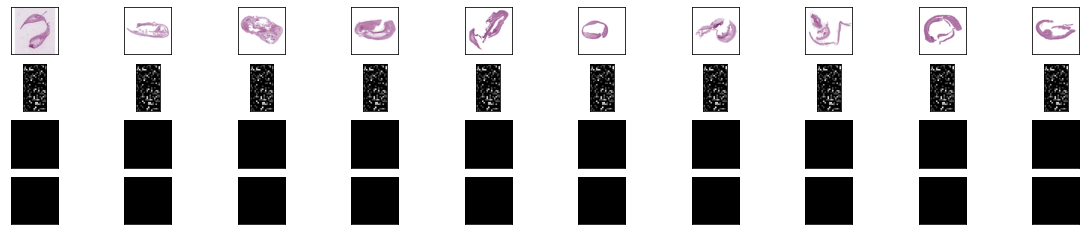

In [6]:
num = 0
PATH = './models/model_gs.pth'
model = AE(299*299*3, 2*GS._best_dict["Encode Dimension"], GS._best_dict["Encode Dimension"])
model.load_state_dict(torch.load(PATH))
show_images(GS._test_set[num], model, amt = 10)